In [ ]:
# Machine Learning-Regression-Assignment

Question 1: What is Simple Linear Regression?

Answer:
Simple Linear Regression is a statistical method used to model the relationship between two variables:

Independent variable (X) → predictor

Dependent variable (Y) → response
It assumes a linear relationship, represented by the equation:

                              Y=β0​+β1​X+ϵ
Where:

𝛽0= intercept,

𝛽1= slope,

ϵ = error term.

Question 2: What are the key assumptions of Simple Linear Regression?

Answer:

Linearity – Relationship between X and Y is linear.

Independence – Observations are independent of each other.

Homoscedasticity – Constant variance of errors.

Normality of errors – Residuals are normally distributed.

No perfect multicollinearity – Not relevant in simple regression (only one X).

Question 3: What is heteroscedasticity, and why is it important to address in regression models?


Answer:

Heteroscedasticity occurs when the variance of residuals (errors) is not constant across all levels of the independent variable(s).

It violates the regression assumption of homoscedasticity.

Why important?

Leads to inefficient estimates.

Standard errors are biased → wrong hypothesis test results.

May mislead conclusions about significance.

Question 4: What is Multiple Linear Regression?

Answer:
Multiple Linear Regression models the relationship between one dependent variable (Y) and two or more independent variables (X1, X2, …, Xn):

                          Y=β0​+β1​X1​+β2​X2​+⋯+βn​Xn​+ϵ
It allows capturing more complex relationships compared to simple regression.

Question 5: What is polynomial regression, and how does it differ from linear regression?

Answer:

Polynomial Regression is a type of regression where the relationship between independent variable (X) and dependent variable (Y) is modeled as an nth-degree polynomial.

Example for 2nd degree:

                              Y=β0​+β1​X+β2​X2+ϵ
Difference from Linear Regression:

Linear regression fits a straight line.

Polynomial regression fits a curve while still being linear in coefficients.

Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

(Include your Python code and output in the code box below.)


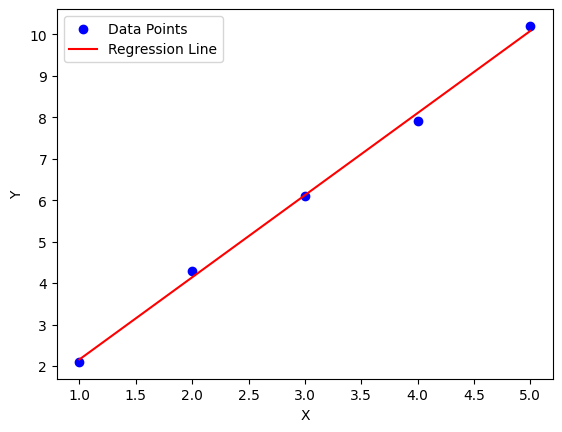

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label="Data Points")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Question 7: Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

(Include your Python code and output in the code box below.)


In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

# Add constant
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(model.summary())
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sun, 31 Aug 2025   Prob (F-statistic):             0.0377
Time:                        11:33:00   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Question 8: Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

(Include your Python code and output in the code box below.)


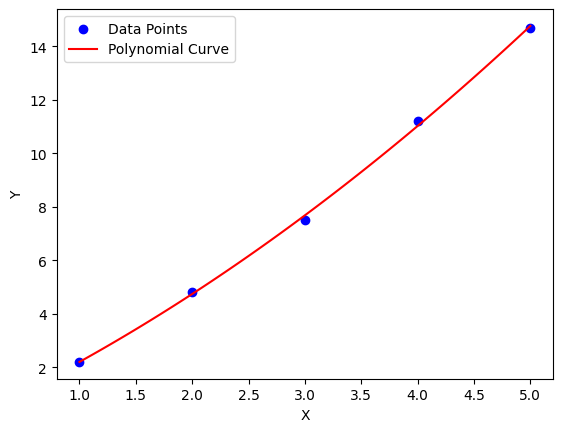

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions
X_range = np.linspace(1, 5, 100).reshape(-1,1)
Y_pred = model.predict(poly.transform(X_range))

# Plot
plt.scatter(X, Y, color='blue', label="Data Points")
plt.plot(X_range, Y_pred, color='red', label="Polynomial Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

(Include your Python code and output in the code box below.)


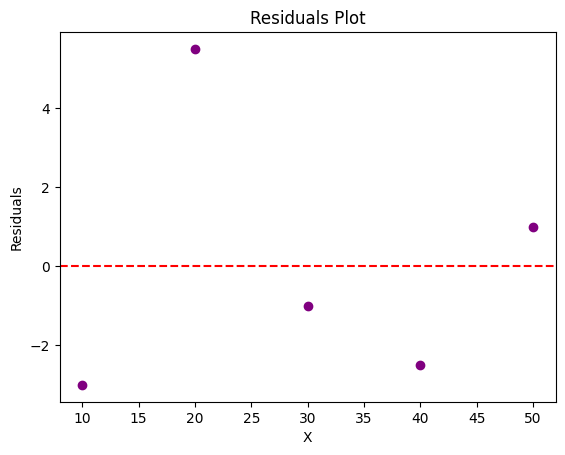

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [4]:
# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1,1)
Y = np.array([15, 35, 40, 50, 65])

# Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

print("Residuals:", residuals)


Interpretation:

If residuals spread increases with X → heteroscedasticity exists.

If spread is constant → homoscedasticity holds.

Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust model.


Answer:
To ensure a robust regression model:

For Heteroscedasticity:

1. Use weighted least squares (WLS) or robust standard errors.
2. Apply transformations (e.g., log of dependent variable).
3. Use models robust to heteroscedasticity (e.g., tree-based methods).

For Multicollinearity:

1. Calculate VIF and remove variables with high VIF.
2. Use dimensionality reduction (PCA, feature selection).
3. Combine correlated features (e.g., “Area per room”).
4. Use regularization methods like Ridge or Lasso regression.